#### Student Name: Mirzoev Rustam

---


#### Student ID:342374345


## Overview
### Due January 9th

Instructions:

This notebook is an interactive assignment; please read and follow the instructions in each cell.

Assignments are to be turned in individually, you can collaborate with one classmate.

Cells that require your input (in the form of code or written response) will have 'Question #' above.

After completing the assignment, please submit this notebook.

Upload your completed assignment on moodle.

In [2]:
! pip install librosa

In [3]:
# If you're collaboraing with a classmate, please fill in the following:

collaboration = {
    "342374345" : "PLACE YOUR COLLABORATOR'S STUDENT ID HERE"
}

# Understanding Sound

For this portion of the assignment, you will load your unique wav file from
https://drive.google.com/drive/folders/1AwtyG4GACSAyBOAFJdpmdKvBOcgsehNz?usp=sharing

Please enter your first and last name, like below, to get the name of your audio file.


In [4]:
import hashlib

def get_hashed_name(first_name, last_name):
  name=(first_name+last_name).encode('utf-8')
  hash_obj = hashlib.sha256(name)
  hex_hash = hash_obj.hexdigest()
  return hex_hash[:8]

In [5]:
your_firstname = "Rustam"
your_lastname = "Mirzoev"
print(get_hashed_name(your_firstname,your_lastname)+".wav")

7147ab84.wav


Your task is to listen and examine your file and try to recreate it with sin waves.

Hints :)
- The length of each frequency used is 3-7 seconds
- Each frequency is set to start at exactly the start of a second
- The amplitudes used are [0.5, 1, 1.5, 2, 2.5]
- Think of all we learned in class (sample rate, wave forms, adding waves, spectrogram, etc.)
- These may be helpful for you
 - http://librosa.org/doc/0.8.1/generated/librosa.display.waveplot.html
  - https://librosa.org/doc/main/generated/librosa.stft.html

In [6]:
import librosa
import librosa.display as dsp

from IPython.display import Audio

import matplotlib.pyplot as plt
import numpy as np

### Modify the line below with your WAV file:
y, sample_rate = librosa.load("7147ab84.wav")

Audio(data=y,rate=sample_rate)

##### Question 1 [20 points]
Reconstruct your wav file using sin waves. Use whatever approach you can think of. Google is your friend if you need it.

Make sure to play your version and also show the difference between the original and your reconstruction.

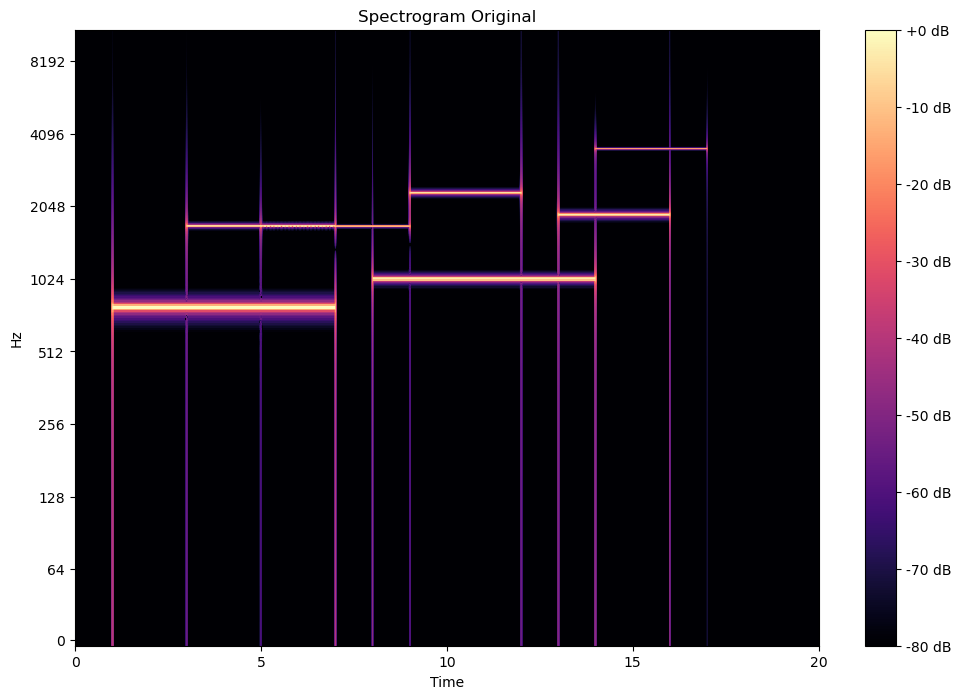

The dominant frequencies between 3s and 7s are: 781.0 Hz and 1700.0 Hz
The dominant frequencies between 9s and 12s are: 1024.0 Hz and 2330.0 Hz
The dominant frequencies between 13s and 14s are: 1888.0 Hz and 1024.0 Hz
The dominant frequencies between 14s and 16s are: 1888.0 Hz and 3544.0 Hz


In [7]:
import librosa.display

# Display the spectrogram
D = np.abs(librosa.stft(y))
plt.figure(figsize=(12, 8))
dsp.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', sr=sample_rate)
plt.title('Spectrogram Original')
plt.colorbar(format='%+2.0f dB')
plt.show()


lone_freq = [(3,7), (9,12), (13,14), (14,16)]  # Time segments
dominant_frequencies = []  # This will hold the dominant frequencies for each segment

for i in range(4):
    start_sample1 = int(lone_freq[i][0] * sample_rate)
    end_sample1 = int(lone_freq[i][1] * sample_rate)
    audio_segment = y[start_sample1:end_sample1]
    
    # Perform the FFT
    fft_result = np.fft.fft(audio_segment)
    # Get the magnitude spectrum
    magnitude_spectrum = np.abs(fft_result[:len(fft_result)//2])  # Only take the first half

    # Find the index of the first and second maximum points in the magnitude spectrum
    first_dominant_index = np.argmax(magnitude_spectrum)
    magnitude_spectrum[first_dominant_index] = 0  # Zero out the first peak
    second_dominant_index = np.argmax(magnitude_spectrum)

    # Convert these indexes to actual frequencies
    first_dominant_frequency = first_dominant_index * sample_rate / len(audio_segment)
    second_dominant_frequency = second_dominant_index * sample_rate / len(audio_segment)
    
    print(f"The dominant frequencies between {lone_freq[i][0]}s and {lone_freq[i][1]}s are: {first_dominant_frequency} Hz and {second_dominant_frequency} Hz")
    
    # Append both frequencies to the dominant_frequencies list
    dominant_frequencies.append((first_dominant_frequency, second_dominant_frequency))

segments = {
    '2.5': [(1, 7)],
    '2': [(8, 14)],
    '1': [(3, 7), (9, 12)],
    '1.5': [(13, 16)],
    '0.5': [(7, 9), (14, 17)]
}

# Define the frequency for each amplitude level
frequencies = {
    '2.5': 781,   # Frequency in Hz for amplitude 2.5 (from 1 to 7 sec)
    '2': 1024,    # Frequency in Hz for amplitude 2 (from 8 to 14 sec)
    '1': 1700,    # Frequency in Hz for amplitude 1 (from 3 to 7 sec)
    '0.5_1700': 1700,   # Frequency in Hz for amplitude 0.5 (from 7 to 9 sec)
    '1_2330': 2330,    # Frequency in Hz for amplitude 1 (from 9 to 12 sec)
    '1.5': 1888,  # Frequency in Hz for amplitude 1.5 (from 13 to 16 sec)
    '0.5_3544': 3544   # Frequency in Hz for amplitude 0.5 (from 14 to 17 sec)
}

# Synthesize the sine waves for each segment
composite_signal = np.zeros(int(sample_rate * 20))  # 20 seconds long, assuming sr is the sample rate
for amplitude, time_ranges in segments.items():
    for start, end in time_ranges:
        # Create the time vector for the current segment
        start_sample = int(start * sample_rate)
        end_sample = int(end * sample_rate)
        t = np.linspace(0, (end_sample - start_sample) / sample_rate, num=(end_sample - start_sample), endpoint=False)
        
        # Determine the correct frequency key
        freq_key = amplitude
        if (start, end) == (7, 9):  # Special case for amplitude 0.5 from 7 to 9 sec
            freq_key = '0.5_1700'
        elif (start, end) == (9, 12):  # Special case for amplitude 1 from 9 to 12 sec
            freq_key = '1_2330'
        elif (start, end) == (14, 17):  # Special case for amplitude 0.5 from 14 to 17 sec
            freq_key = '0.5_3544'
        
        # Get the frequency for the current amplitude level
        freq = frequencies[freq_key]
        
        # Create the sine wave for the current segment
        sine_wave = float(amplitude) * np.sin(2 * np.pi * freq * t)
        
        # Add the sine wave to the composite signal
        composite_signal[start_sample:end_sample] += sine_wave

# Normalize the composite signal
composite_signal /= np.max(np.abs(composite_signal))

# Listen to the reconstructed audio
Audio(data=composite_signal, rate=sample_rate)


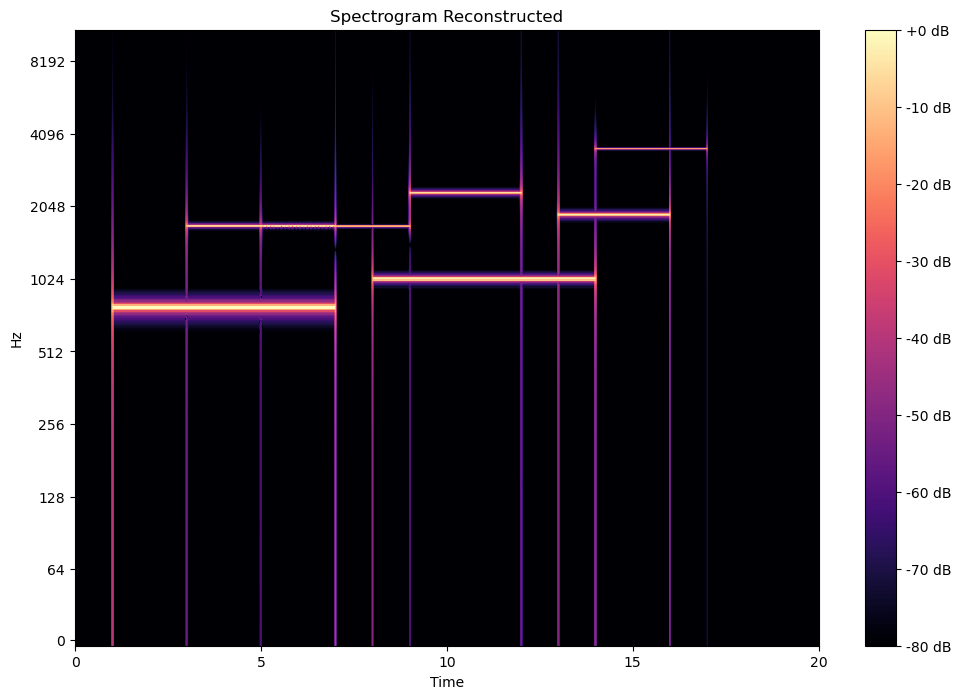

In [8]:

# Display the spectrogram Reconstructed audio
D = np.abs(librosa.stft(y))
plt.figure(figsize=(12, 8))
dsp.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', sr=sample_rate)
plt.title('Spectrogram Reconstructed')
plt.colorbar(format='%+2.0f dB')
plt.show()

##### Question 2 [10 points]
Explain the logic you used to reconstruct the wav file. How did you find the frequencies? How did you figure out where they start and end?
How well did you do?

First I build spectogramma for seeing how frecuencyies is distturbuted, and whith that I figured out that it for some seconds it constant sound with sometimes other parallel frequencyies, so I decided to take those audio segments with periods of time {(3,7), (9,12), (13,14), (14,16)} and for every audio segment I ran FFT algorithm to compute the Discrete Fourier Transform (DFT), which converts the time-domain signal into the frequency domain. Then The [:len(fft_result)//2] part takes only the first half of the FFT result. This is because, for real-valued signals, the second half of the FFT result is a mirror image of the first half and doesn't provide any additional information. This mirroring is a consequence of the signal being real-valued.first_dominant_index = np.argmax(magnitude_spectrum): This line finds the index of the maximum value in the magnitude spectrum, which corresponds to the most dominant frequency in the audio segment. np.argmax() returns the index of the highest value in an array. And I did magnitude_spectrum[first_dominant_index] = 0: After identifying the first dominant frequency, this line sets its value in the magnitude spectrum to zero. This is a way to "remove" this frequency from the spectrum so that when you look for the next dominant frequency, you don't just find the same one again and second_dominant_index = np.argmax(magnitude_spectrum): This line then finds the next most dominant frequency in the updated magnitude spectrum (which no longer includes the first dominant frequency).For finding exact frequencyies in Hz I multiply by the sample rate (which is in Hz) and divide by the total number of samples in the audio segment.

##### Question 3 [20 points]
Show some of your work on how you reconstructed the wav file. Show some actual code you used in understanding what the file is composed of? Visuals are nice.

The dominant frequencies between 3s and 7s are: 781.0 Hz and 1700.0 Hz


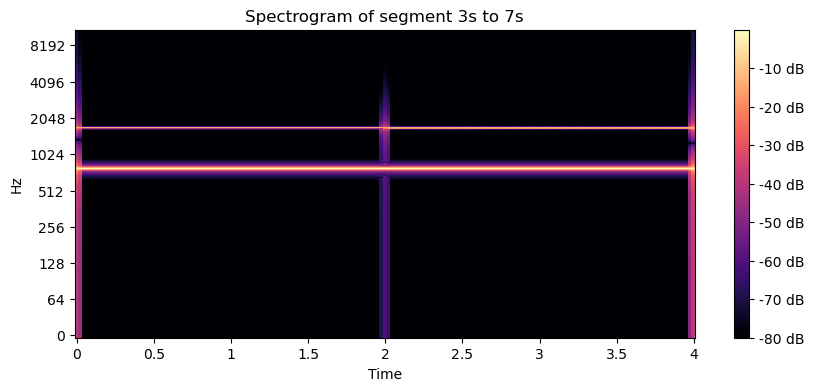

The dominant frequencies between 9s and 12s are: 1024.0 Hz and 2330.0 Hz


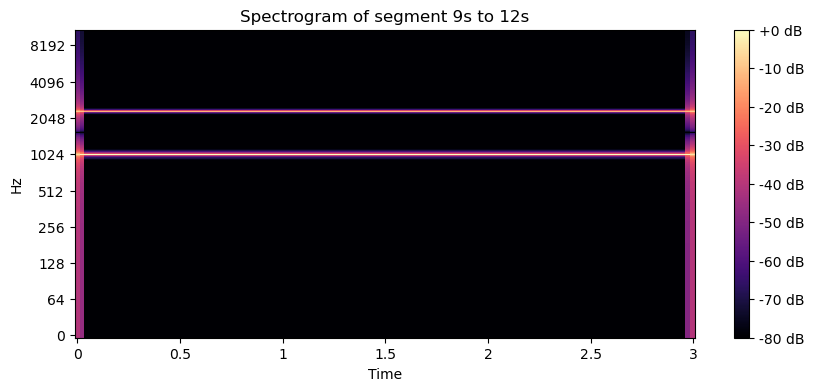

The dominant frequencies between 13s and 14s are: 1888.0 Hz and 1024.0 Hz


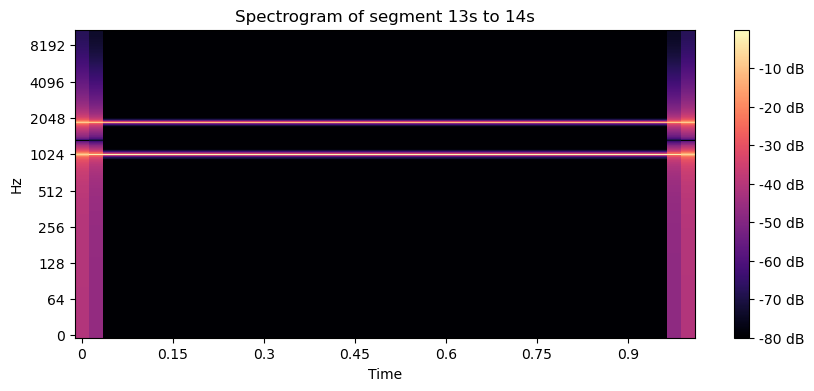

The dominant frequencies between 14s and 16s are: 1888.0 Hz and 3544.0 Hz


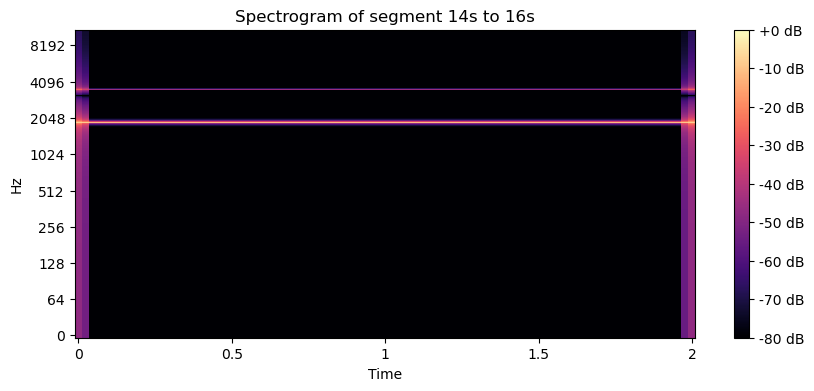

In [10]:
"""Your Code Here"""
lone_freq = [(3,7), (9,12), (13,14), (14,16)]  # Time segments I decided to take for getting actual frequencies
dominant_frequencies = []  # This will hold the dominant frequencies for each segment

for i in range(4):
    # Define the start and end samples for the current segment
    start_sample1 = int(lone_freq[i][0] * sample_rate)
    end_sample1 = int(lone_freq[i][1] * sample_rate)
    audio_segment = y[start_sample1:end_sample1]
    
    # Perform the FFT
    fft_result = np.fft.fft(audio_segment)
    # Get the magnitude spectrum (only the first half)
    magnitude_spectrum = np.abs(fft_result[:len(fft_result)//2])

    # Find the index of the first and second maximum points in the magnitude spectrum
    first_dominant_index = np.argmax(magnitude_spectrum)
    magnitude_spectrum[first_dominant_index] = 0  # Zero out the first peak
    second_dominant_index = np.argmax(magnitude_spectrum)

    # Convert these indexes to actual frequencies
    first_dominant_frequency = first_dominant_index * sample_rate / len(audio_segment)
    second_dominant_frequency = second_dominant_index * sample_rate / len(audio_segment)
    
    print(f"The dominant frequencies between {lone_freq[i][0]}s and {lone_freq[i][1]}s are: {first_dominant_frequency} Hz and {second_dominant_frequency} Hz")
    
    # Append both frequencies to the dominant_frequencies list
    dominant_frequencies.append((first_dominant_frequency, second_dominant_frequency))
    
    # Visualize the spectrogram of the current audio segment
    plt.figure(figsize=(10, 4))
    D = np.abs(librosa.stft(audio_segment))
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                             y_axis='log', x_axis='time', sr=sample_rate)
    plt.title(f'Spectrogram of segment {lone_freq[i][0]}s to {lone_freq[i][1]}s')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

segments = {
    '2.5': [(1, 7)],
    '2': [(8, 14)],
    '1': [(3, 7), (9, 12)],
    '1.5': [(13, 16)],
    '0.5': [(7, 9), (14, 17)]
}

# Define the frequency for each amplitude level
frequencies = {
    '2.5': 781,   # Frequency in Hz for amplitude 2.5 (from 1 to 7 sec)
    '2': 1024,    # Frequency in Hz for amplitude 2 (from 8 to 14 sec)
    '1': 1700,    # Frequency in Hz for amplitude 1 (from 3 to 7 sec)
    '0.5_1700': 1700,   # Frequency in Hz for amplitude 0.5 (from 7 to 9 sec)
    '1_2330': 2330,    # Frequency in Hz for amplitude 1 (from 9 to 12 sec)
    '1.5': 1888,  # Frequency in Hz for amplitude 1.5 (from 13 to 16 sec)
    '0.5_3544': 3544   # Frequency in Hz for amplitude 0.5 (from 14 to 17 sec)
}

# Synthesize the sine waves for each segment
composite_signal = np.zeros(int(sample_rate * 20))  # 20 seconds long, assuming sr is the sample rate
for amplitude, time_ranges in segments.items():
    for start, end in time_ranges:
        # Create the time vector for the current segment
        start_sample = int(start * sample_rate)
        end_sample = int(end * sample_rate)
        t = np.linspace(0, (end_sample - start_sample) / sample_rate, num=(end_sample - start_sample), endpoint=False)
        
        # Determine the correct frequency key
        freq_key = amplitude
        if (start, end) == (7, 9):  # Special case for amplitude 0.5 from 7 to 9 sec
            freq_key = '0.5_1700'
        elif (start, end) == (9, 12):  # Special case for amplitude 1 from 9 to 12 sec
            freq_key = '1_2330'
        elif (start, end) == (14, 17):  # Special case for amplitude 0.5 from 14 to 17 sec
            freq_key = '0.5_3544'
        
        # Get the frequency for the current amplitude level
        freq = frequencies[freq_key]
        
        # Create the sine wave for the current segment
        sine_wave = float(amplitude) * np.sin(2 * np.pi * freq * t)
        
        # Add the sine wave to the composite signal
        composite_signal[start_sample:end_sample] += sine_wave

##### Question 4 [20 points]
Resample your file so that only three or four different frequencies remain. Resample down and then back up to the original sample rate.

Hint:
- https://librosa.org/doc/main/generated/librosa.resample.html
- How can we see the frequencies?
- What is the relationship between the sample rate and the maximum frequency detectable?

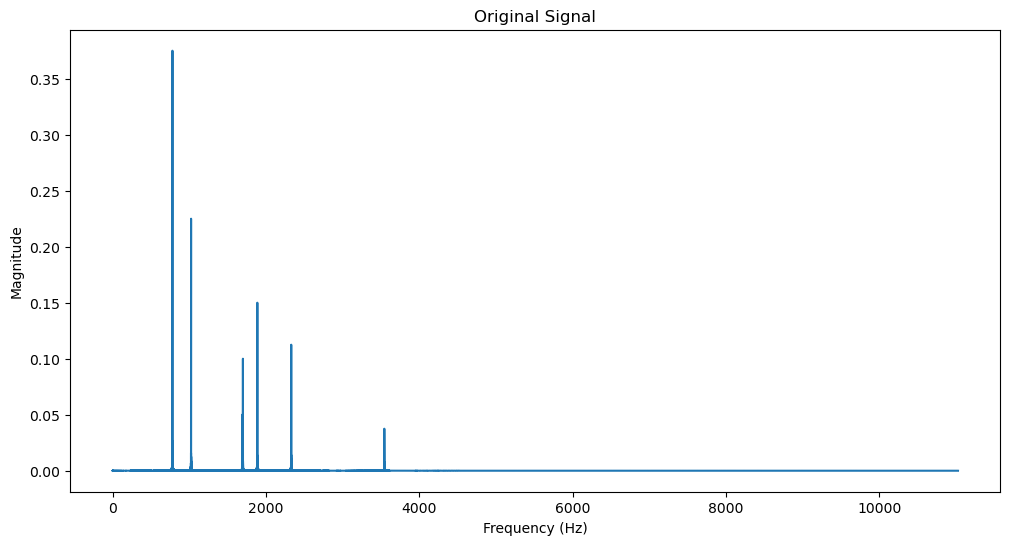

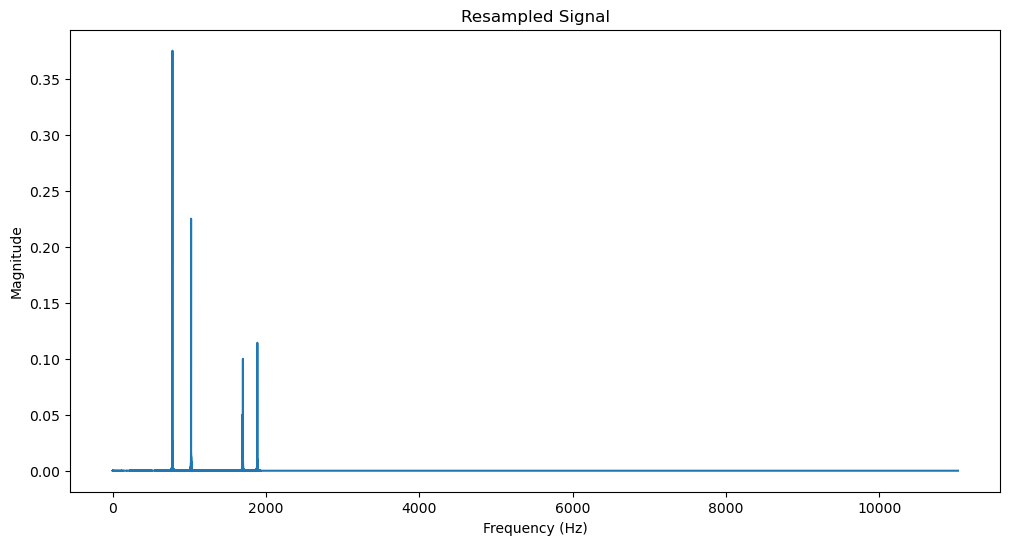

In [14]:
"""Your Code Here"""

# Define the new lower sample rate than original
new_sample_rate = 4000  

# Resample down
y_down = librosa.resample(y, orig_sr=sample_rate, target_sr=new_sample_rate)

# Resample back up
y_up = librosa.resample(y_down, orig_sr=new_sample_rate, target_sr=sample_rate)

# Function to calculate and plot the Fourier Transform
def plot_fft(signal, sample_rate, title):
    n = len(signal)
    freq = np.fft.rfftfreq(n, d=1./sample_rate)
    Y = np.abs(np.fft.rfft(signal)/n)
    plt.figure(figsize=(12, 6))
    plt.plot(freq, Y)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.show()

# Plot the original and resampled signals
plot_fft(y, sample_rate, 'Original Signal')
plot_fft(y_up, sample_rate, 'Resampled Signal')

##### Question 5 [20 points]
Generate phase for your file using GriffinLim.
Show the following:
- Your waveform after stft and then istft
- Your waveform after 0 iteration of GL
- Your waveform after GL
- The difference between the original and the 0 iter version
- The difference between the original and the GM version
- The difference between the original and the stft-istft version
 - Note that doing STFT and back looses some information so you may need to crop your original vector to match the sizes

Hint:
- https://librosa.org/doc/main/generated/librosa.griffinlim.html
- How can we see the frequencies?
- What is the relationship between the sample rate and the maximum frequency detectable?

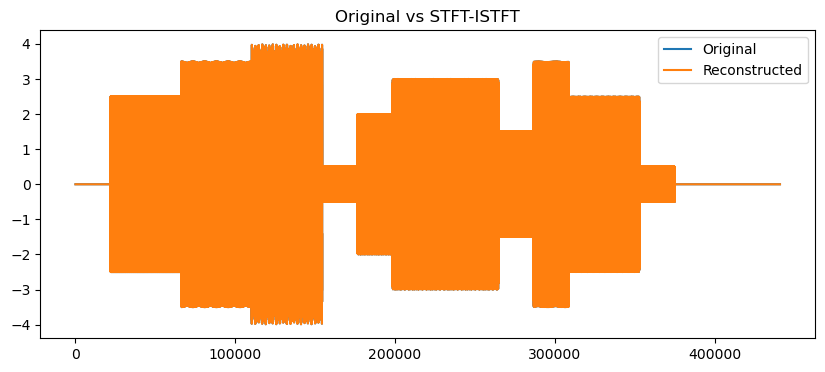

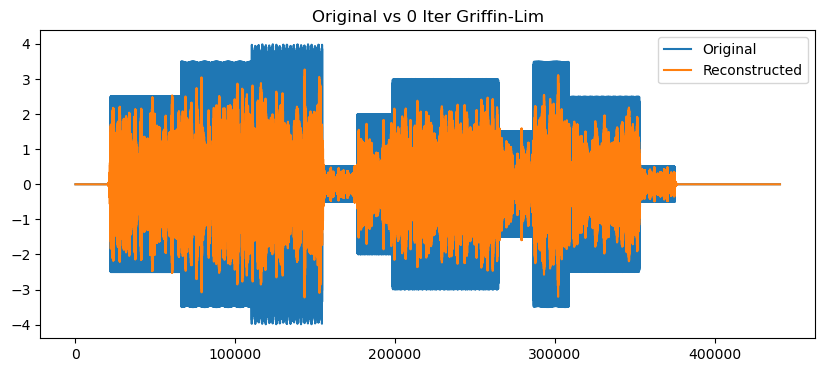

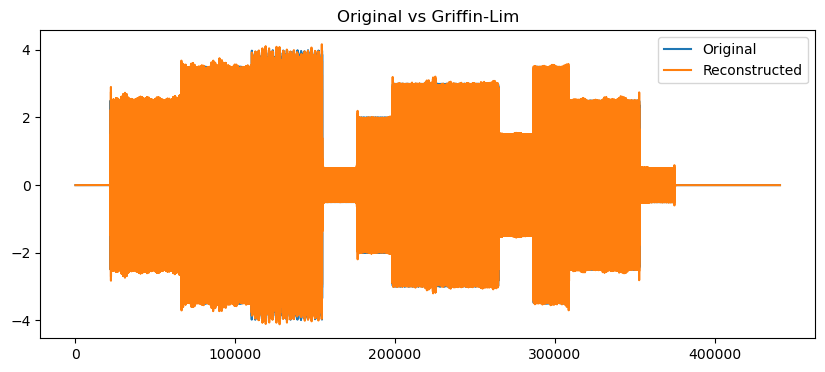

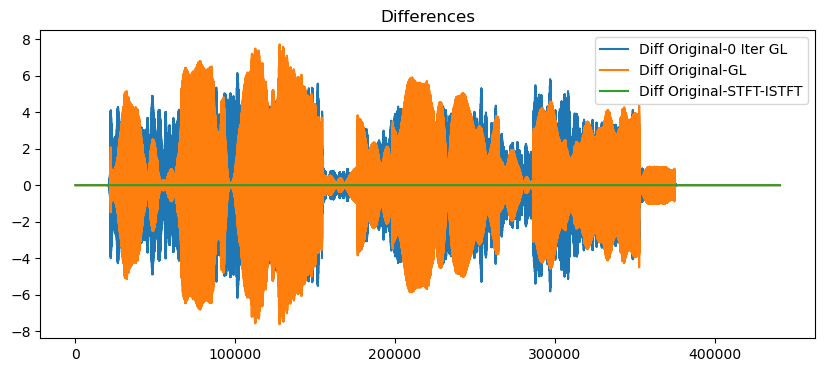

In [16]:
"""Your Code Here"""
D = librosa.stft(y)

# Inverse STFT with original phase
y_istft = librosa.istft(D)

# Griffin-Lim with 0 iterations 
y_gl0 = librosa.griffinlim(np.abs(D), n_iter=0)

# Griffin-Lim 
y_gl = librosa.griffinlim(np.abs(D))

# Difference between the original and the 0 iter version
diff_gl0 = y[:len(y_gl0)] - y_gl0

# Difference between the original and the GL version
diff_gl = y[:len(y_gl)] - y_gl

# Difference between the original and the stft-istft version
diff_istft = y[:len(y_istft)] - y_istft

def plot_waveforms(original, reconstructed, title):
    plt.figure(figsize=(10, 4))
    plt.plot(original, label='Original')
    plt.plot(reconstructed, label='Reconstructed')
    plt.title(title)
    plt.legend()
    plt.show()

# Original vs STFT-ISTFT
plot_waveforms(y[:len(y_istft)], y_istft, 'Original vs STFT-ISTFT')

# Original vs 0 Iteration Griffin-Lim
plot_waveforms(y[:len(y_gl0)], y_gl0, 'Original vs 0 Iter Griffin-Lim')

# Original vs Griffin-Lim
plot_waveforms(y[:len(y_gl)], y_gl, 'Original vs Griffin-Lim')

# Plot the differences
plt.figure(figsize=(10, 4))
plt.plot(diff_gl0, label='Diff Original-0 Iter GL')
plt.plot(diff_gl, label='Diff Original-GL')
plt.plot(diff_istft, label='Diff Original-STFT-ISTFT')
plt.title('Differences')
plt.legend()
plt.show()


##### Question 6 [10 points]

Describe the difference between the Griffith & Lim and the perfect reconstruction. Does it sound similar? Can you see the difference in the waveform?

```Your Answer Here```